# Digit Recognizer

In [1]:
import numpy as np 
import pandas as pd 
import random as rn
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold 
import itertools
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Loading the Data

In [2]:
#loading the the data 
train=pd.read_csv('C:/Users/Shiva Chandra/Desktop/ML/train.csv')
train.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train.shape

(42000, 785)

In [4]:
#loading the the data 
test=pd.read_csv('C:/Users/Shiva Chandra/Desktop/ML/test.csv')
test.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.shape

(28000, 784)

In [6]:
Y = train["label"]
X = train.drop(["label"],axis = 1)
X_test = test
print(X.head())
print('-'*100)
print(Y.head())
print('-'*100)
print(X_test.head())

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0   

# Normalization

In [7]:
#normalization
X = X/255.0
X_test = X_test/255.0

In [8]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
print("X:")
print(X.info())
print("-"*100)
print("X_test:")
print(X_test.info())
print("-"*100)
print("Y:")
print(Y.shape)

X:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 784 entries, pixel0 to pixel783
dtypes: float64(784)
memory usage: 251.2 MB
None
----------------------------------------------------------------------------------------------------
X_test:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: float64(784)
memory usage: 167.5 MB
None
----------------------------------------------------------------------------------------------------
Y:
(42000,)


In [10]:
Y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

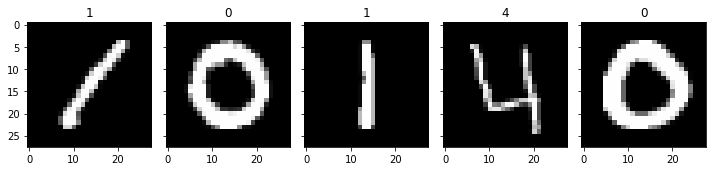

In [11]:
fig, axs = plt.subplots(1, 5, sharex=True, sharey=True, figsize=(10,6))
axs = axs.flatten()
for i in range(0,5):
    pop= X.iloc[i]
    pop= pop.values.reshape(-1,28,28,1)
    axs[i].imshow(pop[0,:,:,0], cmap=plt.get_cmap('gray'))
    axs[i].set_title(Y[i])
plt.tight_layout() 

# Distribution of the Labels

In [12]:
Y.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

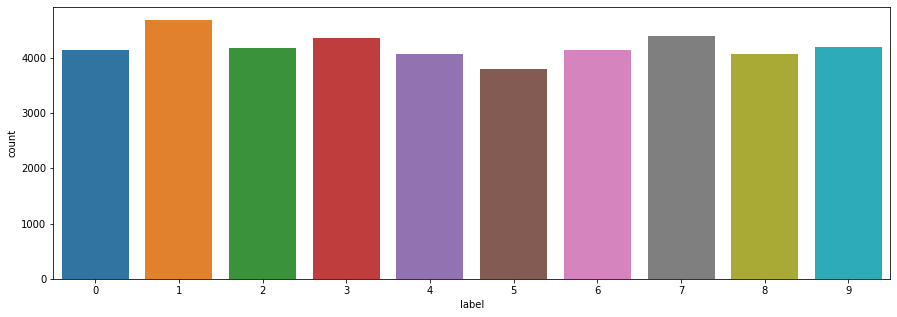

In [13]:
fig, ax = plt.subplots(figsize=(15,5))
g = sns.countplot(Y)

# Get indexes of first 10 occurences for each number

In [14]:
li_idxs = []
for i in range(10):
    for nr in range(10):
        ix = Y[Y==nr].index[i]
        li_idxs.append(ix)
li_idxs

[1,
 0,
 16,
 7,
 3,
 8,
 21,
 6,
 10,
 11,
 4,
 2,
 22,
 9,
 32,
 19,
 26,
 18,
 20,
 27,
 5,
 12,
 24,
 13,
 39,
 51,
 45,
 29,
 30,
 28,
 17,
 15,
 34,
 14,
 42,
 62,
 64,
 47,
 67,
 31,
 23,
 35,
 44,
 25,
 43,
 80,
 72,
 48,
 82,
 33,
 54,
 37,
 55,
 36,
 49,
 99,
 74,
 50,
 87,
 40,
 63,
 38,
 56,
 46,
 66,
 107,
 89,
 76,
 105,
 53,
 69,
 41,
 73,
 57,
 75,
 119,
 91,
 102,
 106,
 58,
 98,
 52,
 84,
 65,
 78,
 125,
 93,
 103,
 131,
 71,
 108,
 59,
 94,
 70,
 81,
 128,
 109,
 116,
 135,
 83]

# First 10 image samples for each digit

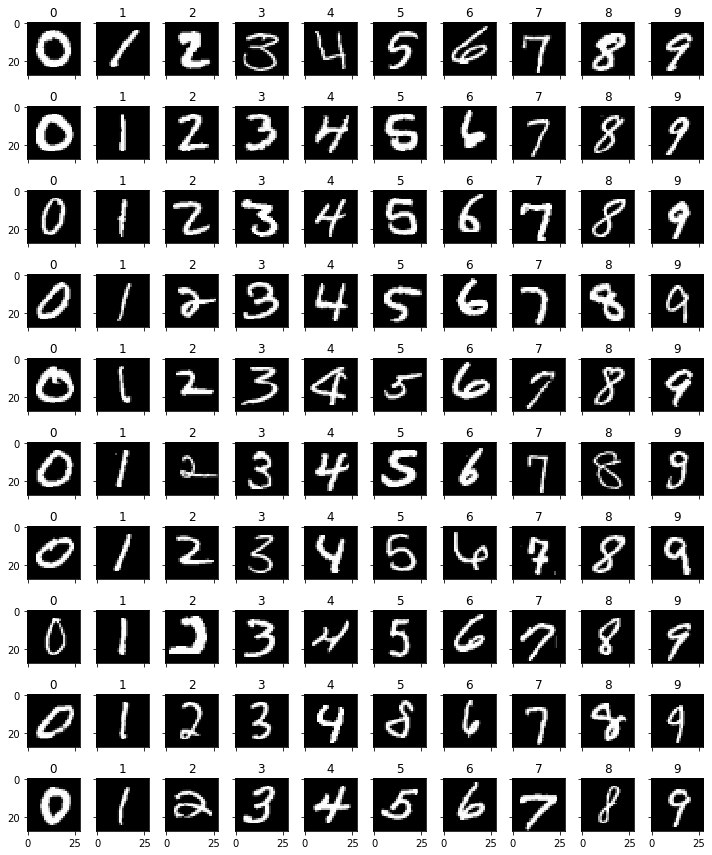

In [15]:
fig, axs = plt.subplots(10, 10, sharex=True, sharey=True, figsize=(10,12))
axs = axs.flatten()
for n, i in enumerate(li_idxs):
    im = X.iloc[i]
    im = im.values.reshape(-1,28,28,1)
    axs[n].imshow(im[0,:,:,0], cmap=plt.get_cmap('gray'))
    axs[n].set_title(Y[i])
plt.tight_layout()

In [16]:
# for best performance, especially of the NN classfiers,
# set mode = "commit"
mode = "edit"
mode = "commit"
#

if mode == "edit" :
    nr_samples = 1200

if mode == "commit" :    
    nr_samples = 30000

Y_train=Y[:nr_samples]
X_train=X[:nr_samples]
start_ix_val = nr_samples 
end_ix_val = nr_samples + int(nr_samples/3)
Y_val=Y[start_ix_val:end_ix_val]
X_val=X[start_ix_val:end_ix_val]
    
print("nr_samples train data:", nr_samples)
print("start_ix_val:", start_ix_val)
print("end_ix_val:", end_ix_val)

nr_samples train data: 30000
start_ix_val: 30000
end_ix_val: 40000


# Performing Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)

C:\Users\Shiva Chandra\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shiva Chandra\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
model.predict(X_train)

array([1, 0, 1, ..., 2, 5, 0], dtype=int64)

In [19]:
predicted_train = model.predict(X_train)
true_value = Y_train

In [20]:
predicted_train

array([1, 0, 1, ..., 2, 5, 0], dtype=int64)

In [21]:
from sklearn.metrics import accuracy_score
print("Train Accuracy {:.2%}".format(accuracy_score(true_value,predicted_train)))

Train Accuracy 93.31%


In [22]:
model = LogisticRegression(C = 0.01, tol = 0.001, class_weight = "balanced",random_state = 42)
model.fit(X_train,Y_train)
predicted_train = model.predict(X_val)
print("Train Accuracy {:.2%}".format(accuracy_score(Y_val,predicted_train)))

C:\Users\Shiva Chandra\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shiva Chandra\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train Accuracy 90.41%


In [23]:
from sklearn.metrics import confusion_matrix,classification_report
print("Classification Report")
print (classification_report(Y_val,predicted_train))
print ("Confusion matrix")
print (confusion_matrix(Y_val,predicted_train))

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       998
           1       0.92      0.98      0.95      1127
           2       0.90      0.88      0.89       967
           3       0.90      0.88      0.89      1060
           4       0.89      0.91      0.90       914
           5       0.90      0.81      0.85       914
           6       0.93      0.95      0.94       951
           7       0.92      0.91      0.92      1066
           8       0.87      0.87      0.87       995
           9       0.86      0.87      0.87      1008

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Confusion matrix
[[ 969    0    1    3    1    3   10    1   10    0]
 [   0 1101    3    1    0    3    1    2   16    0]
 [   9   11  849   12   16    4   16   19   28    3]
 [   2    9   42  929    0   28    6    9  

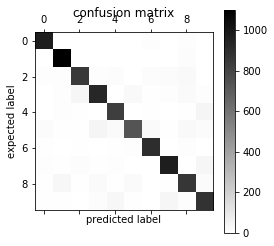

In [24]:
import matplotlib.pyplot as plt
plt.matshow(confusion_matrix(Y_val,predicted_train), cmap=plt.cm.binary, interpolation='nearest')
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')
plt.show()

# Performing KNN


In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier(n_neighbors = 10)
model.fit(X_train,Y_train)
predicted_train = model.predict(X_val)
true_value = Y_val
print("Train Accuracy {:.2%}".format(accuracy_score(true_value,predicted_train)))

Train Accuracy 96.38%


In [26]:
from sklearn.metrics import confusion_matrix,classification_report
print("Classification Report")
print (classification_report(true_value,predicted_train))
print ("Confusion matrix")
print (confusion_matrix(true_value,predicted_train))

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       998
           1       0.93      1.00      0.96      1127
           2       0.98      0.95      0.97       967
           3       0.97      0.96      0.97      1060
           4       0.98      0.96      0.97       914
           5       0.96      0.96      0.96       914
           6       0.97      0.99      0.98       951
           7       0.95      0.97      0.96      1066
           8       0.99      0.92      0.95       995
           9       0.95      0.94      0.94      1008

    accuracy                           0.96     10000
   macro avg       0.97      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

Confusion matrix
[[ 990    1    0    0    0    2    5    0    0    0]
 [   0 1124    1    0    2    0    0    0    0    0]
 [  14   15  918    2    1    3    1   11    1    1]
 [   0    9    9 1020    1    7    0    5  

# Performing Random Forest Classifier


In [27]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth = 15, min_samples_leaf = 10, max_features = 'sqrt',n_estimators = 50)
model.fit(X_train,Y_train)
predicted_train = model.predict(X_val)
true_value = Y_val
print("Train Accuracy {:.2%}".format(accuracy_score(true_value,predicted_train)))

Train Accuracy 95.24%


# Performing SVM


In [28]:
from sklearn import svm
#svc = svm.SVC(kernel='linear', C=1,gamma=1,).fit(X_train, Y_train)
svc = svm.SVC(C=5, gamma=0.05, kernel='rbf', random_state=0).fit(X_train, Y_train)

In [29]:
predicated_train = svc.predict(X_val)
true_value=Y_val
print("Train Accuracy {:.2%}".format(accuracy_score(true_value,predicted_train)))

Train Accuracy 95.24%


# By ANN

In [2]:
train=pd.read_csv('C:/Users/Shiva Chandra/Desktop/ML/train.csv')
train.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test=pd.read_csv('C:/Users/Shiva Chandra/Desktop/ML/test.csv')
test.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
type(train)

pandas.core.frame.DataFrame

In [18]:
y=train['label'].values
x= train.drop(["label"],axis = 1)
y.shape

(42000,)

In [19]:
x=np.array(x)

In [22]:
x.shape

(42000, 28, 28, 1)

In [21]:
x=x.reshape(42000,28,28,1)

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D,MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
z=le.fit_transform(y)

In [24]:
from keras.utils.np_utils import to_categorical
z = to_categorical(z,10)

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,z,test_size=0.2,random_state=59)

In [52]:
classifier=Sequential()

#1ST Fully connected layer
classifier.add(Dense(output_dim=100,init='uniform',input_dim=784,activation='relu'))
classifier.add(Dense(output_dim=50,init='uniform',activation='relu'))
#output layer
classifier.add(Dense(output_dim=10,init='uniform',activation='softmax'))

classifier.summary()

classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


W0926 15:49:13.830353  8036 deprecation_wrapper.py:119] From C:\Users\Shiva Chandra\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

C:\Users\Shiva Chandra\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="relu", units=100, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
W0926 15:49:13.861601  8036 deprecation_wrapper.py:119] From C:\Users\Shiva Chandra\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0926 15:49:13.861601  8036 deprecation_wrapper.py:119] From C:\Users\Shiva Chandra\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecat

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=classifier.fit(x_train,y_train,epochs=50,batch_size=100,validation_data=(x_test,y_test))

Train on 33600 samples, validate on 8400 samples
Epoch 1/50
33600/33600 [==============================] - 23s 683us/step - loss: 12.6948 - acc: 0.2101 - val_loss: 12.7005 - val_acc: 0.2118
Epoch 2/50
33600/33600 [==============================] - 23s 683us/step - loss: 12.6644 - acc: 0.2140 - val_loss: 12.6357 - val_acc: 0.2117
Epoch 3/50
33600/33600 [==============================] - 22s 669us/step - loss: 0.3677 - acc: 0.9428 - val_loss: 0.0765 - val_acc: 0.9774
Epoch 4/50
  700/33600 [..............................] - ETA: 20s - loss: 0.0487 - acc: 0.9843

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=59)

In [16]:
x_train.shape

(33600, 28, 28, 1)

In [17]:
x_train=x_train.reshape(33600,28,28,1)

In [26]:
classifier=Sequential()
# 1st Convolutional Layer
classifier.add(Convolution2D(64,3,3,input_shape=(28,28,1),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),padding='same'))


# 2nd Convolutional Layer
classifier.add(Convolution2D(128,3,3,activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),padding='same'))





classifier.add(Flatten())
#1ST Fully connected layer
classifier.add(Dense(output_dim=100,activation='relu'))
classifier.add(Dense(output_dim=100,activation='relu'))

#output layer
classifier.add(Dense(output_dim=10,activation='softmax'))

classifier.summary()

classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               460900    
_________________________________________________________________
dense_5 (Dense)              (None, 100)              

C:\Users\Shiva Chandra\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Shiva Chandra\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
C:\Users\Shiva Chandra\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=100)`
C:\Users\Shiva Chandra\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=100)`
C:\Users\Shiva Chandra\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Update your `Dense` c